In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [2]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 32 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=68d40e43a99036ede1bf92c4cf368e21320729ec8d14c90426248d65d18dd7cd
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h2o
from h2o.automl import H2OAutoML

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1k712g8h
  JVM stdout: /tmp/tmp1k712g8h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1k712g8h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_mr9ryo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
df=pd.read_csv("https://github.com/srivatsan88/YouTubeLI/blob/master/dataset/consumer_compliants.zip?raw=True", compression='zip', sep=",", quotechar='"')

In [7]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/3/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,This auto loan was opened on XX/XX/2020 in XXX...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,PA,None,None,Consent provided,Web,4/3/2020,Closed with explanation,Yes,NaN,3591341
1,3/12/2020,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,In XXXX of 2019 I noticed a debt for {$620.00}...,None,CURO Intermediate Holdings,CO,806XX,None,Consent provided,Web,3/12/2020,Closed with explanation,Yes,NaN,3564184
2,2/6/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,"As stated from Capital One, XXXX XX/XX/XXXX an...",None,CAPITAL ONE FINANCIAL CORPORATION,OH,430XX,None,Consent provided,Web,2/6/2020,Closed with explanation,Yes,NaN,3521949
3,3/6/2020,Checking or savings account,Savings account,Managing an account,Banking errors,"Please see CFPB case XXXX. \n\nCapital One, in...",None,CAPITAL ONE FINANCIAL CORPORATION,CA,None,None,Consent provided,Web,3/6/2020,Closed with explanation,Yes,NaN,3556237
4,2/14/2020,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,This debt was incurred due to medical malpract...,Company believes it acted appropriately as aut...,"Merchants and Professional Bureau, Inc.",OH,432XX,None,Consent provided,Web,2/14/2020,Closed with explanation,Yes,NaN,3531704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57448,2/29/2020,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,I am attempting to make a payment toward my st...,None,"Nelnet, Inc.",KS,None,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549178
57449,2/11/2020,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,Received letter for {$480.00}. Original credit...,Company has responded to the consumer and the ...,"The Receivable Management Services LLC, New Yo...",AZ,853XX,None,Consent provided,Web,2/18/2020,Closed with explanation,Yes,NaN,3527928
57450,2/29/2020,Debt collection,Other debt,Communication tactics,"Used obscene, profane, or other abusive language",entire time 10 years until XX/XX/2020. XXXX ma...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,8101,None,Consent provided,Web,2/29/2020,Closed with explanation,Yes,NaN,3549238
57451,1/16/2020,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,I am a customer with Wells Fargo Bank. Recentl...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AZ,852XX,None,Consent provided,Web,1/22/2020,Closed with explanation,Yes,NaN,3498566


In [8]:
df["Product"].value_counts()

Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: Product, dtype: int64

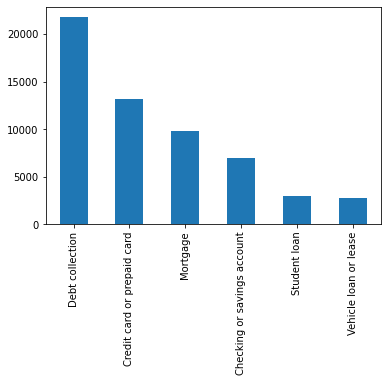

In [9]:
df["Product"].value_counts().plot(kind='bar')

In [10]:
df["Company"].value_counts()

CITIBANK, N.A.                           3226
CAPITAL ONE FINANCIAL CORPORATION        2711
BANK OF AMERICA, NATIONAL ASSOCIATION    2580
JPMORGAN CHASE & CO.                     2409
WELLS FARGO & COMPANY                    2001
                                         ... 
The Home Loan Expert LLC                    1
360 Mortgage Inc.                           1
Alacrity Collections Corporation            1
AmeriCash Holding LLC                       1
Lenox Financial Mortgage Corporation        1
Name: Company, Length: 2197, dtype: int64

In [11]:
complaints_df = df[["Product", "Company", "Consumer complaint narrative"]].rename(columns={"Consumer complaint narrative":"Complaints"})

In [12]:
pd.set_option("display.max_colwidth", -1)
complaints_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Product,Company,Complaints
0,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account."
1,Debt collection,CURO Intermediate Holdings,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back."
2,Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times."
3,Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that."
4,Debt collection,"Merchants and Professional Bureau, Inc.","This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit reporting agencies.

In [13]:
target = {"Debt collection":0, "Credit card or prepaid card":1, "Mortgage":2, "Checking or savings account":3, "Student loan":4, "Vehicle loan or lease":5}

In [14]:
complaints_df["target"] = complaints_df["Product"].map(target)

In [15]:
complaints_df

,Product,Company,Complaints,target
0,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",5
1,Debt collection,CURO Intermediate Holdings,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",0
2,Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",5
3,Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the account-holder 's business - have looked for return of my money ( {$650.00} ) and find nothing. \n\nCapital One needs to document - actually prove - they returned the funds, as stated in their letter. Capital One must provide electronic information, if the return was made that way, or document the paper check they sent back to XXXX XXXX. \n\nI've left 3 messages about this problem for the person who signed the letter ( XXXX ) from Capital One. I have received no call-backs. \n\nSummary : Capital One said they returned my money on XX/XX/XXXX : they did not. If they continue claim they did, then they need to prove that.",3
4,Debt collection,"Merchants and Professional Bureau, Inc.","This debt was incurred due to medical malpractice ( XXXX XXXX XXXX, XXXX, TX ). I asked the doctor to turn over my claim to his malpractice insurance company. This has cost me thousands of dollars to XXXX XXXX XXXX. I am still trying to collect damages from this doctor. He never responded and turned over me to collections Merchants and Professional Collection Bureau , Inc. I sent them a letter describing exactly this issue and instead of not contacting me and verifying my debt they start reporting this debt to the credit repo

In [16]:
X_train, X_test = train_test_split(complaints_df, test_size=0.8, random_state=111)

In [17]:
stemmer = nltk.stem.SnowballStemmer("english")

In [18]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def tokenize(text):
  tokens = [word for word in nltk.word_tokenize(text) if (len(word)>3 and len(word.strip("Xx/")) > 2 and len(re.sub(r'\d+', '', word.strip('Xx/'))))]
  tokens = map(str.lower, tokens)
  stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
  return stems

In [20]:
complaints_df["Complaints_tok"] = complaints_df["Complaints"].apply(lambda x: tokenize(x))

In [21]:
complaints_df.head()

,Product,Company,Complaints,target,Complaints_tok
0,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,"This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",5,"[auto, loan, open, name, never, north, carolina, never, resid, file, disput, twice, credit, bureaus, time, claim, accur, loan, awar, today, tri, contact, multipl, time, never, gotten, live, person, drive, never, own, knowledg, account, check, notic, tri, twice, disput, addit, never, receiv, bill, inform, account, last, resort, tri, remov, fraudul, loan, account]"
1,Debt collection,CURO Intermediate Holdings,"In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that i can not get my money back. The issue im having is this representative at XXXX XXXX played blind to obvious fraud and let an innocent person make a payment on someone elses debt and i want my money back.",0,"[notic, debt, 620.00, credit, believ, mine, thought, speedi, cash, bought, debt, sold, contact, sever, attempt, give, full, name, noth, came, system, gave, social, said, account, pop, tell, account, someon, els, name, continu, make, payment, payment, 120.00, confirm, number-xxxx, realiz, account, call, back, money, back, inform, mistak, told, need, mail, report, disput, letter, money, back, complet, call, said, transfer, account, back, speedi, cash, fraud, review, would, need, contact, contact, told, money, back, issu, repres, play, blind, obvious, fraud, innoc, person, make, payment, someon, els, debt, want, money, back]"
2,Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,"As stated from Capital One, XXXX XX/XX/XXXX and XXXX 2018, My wife and I went to several car dealerships to request for a car loan to get a used car. However, according to their credit requirements unfortunately my credit score was insufficient for the car loan approval at that time. It seemed as though they pulled my credit report multiple times.",5,"[state, capit, wife, went, sever, dealership, request, loan, use, howev, accord, credit, requir, unfortun, credit, score, insuffici, loan, approv, time, seem, though, pull, credit, report, multipl, time]"
3,Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,"Please see CFPB case XXXX. \n\nCapital One, in the letter they provided ( and attached to that case as their response ) said this : "" The funds were reversed and sent back to XXXX XXXX XXXX on XX/XX/XXXX ''. \n\nXXXX XXXX XXXX ( now XXXX XXXX ) has not received these funds. Staff at XXXX XXXX - and also staff at the a

In [22]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
train_vectors =  vectorizer_tf.fit_transform(X_train.Complaints)

In [23]:
train_vectors.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.47303244, 0.        , ..., 0.        , 0.        ,
        0.085629  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
train_vectors.shape

(11490, 1000)

In [25]:
vectorizer_tf.get_feature_names_out()

array(['0.00', '100.00', '1000.00', '1500.00', '200.00', '2000.00',
       '300.00', '500.00', 'abil', 'abl', 'absolut', 'abus', 'accept',
       'access', 'accord', 'account', 'account account', 'account balanc',
       'account call', 'account close', 'account credit',
       'account number', 'account open', 'account report',
       'account would', 'accru', 'acct', 'accur', 'acknowledg', 'action',
       'activ', 'actual', 'ad', 'addit', 'address', 'adjust', 'admit',
       'advanc', 'advertis', 'advis', 'affect', 'affidavit', 'afford',
       'agenc', 'agent', 'agre', 'agreement', 'alert', 'alleg',
       'alleg debt', 'alli', 'allow', 'almost', 'along', 'alreadi',
       'also', 'although', 'alway', 'america', 'american',
       'american express', 'amex', 'amount', 'amount owe', 'and/or',
       'annual', 'anoth', 'answer', 'anyon', 'anyth', 'apart', 'appar',
       'appeal', 'appear', 'appli', 'applic', 'apprais', 'appreci',
       'approv', 'approxim', 'around', 'arrang', 'arr

In [26]:
test_vectors = vectorizer_tf.transform(X_test.Complaints)

In [27]:
X_train.shape

(11490, 4)

In [28]:
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())
train_df=pd.concat([train_df, X_train['target'].reset_index(drop=True)], axis=1)
train_df

,0.00,100.00,1000.00,1500.00,200.00,2000.00,300.00,500.00,abil,abl,absolut,abus,accept,access,accord,account,account account,account balanc,account call,account close,account credit,account number,account open,account report,account would,accru,acct,accur,acknowledg,action,activ,actual,ad,addit,address,adjust,admit,advanc,advertis,advis,...,verif,verifi,victim,victim ident,violat,visa,visit,voicemail,wait,waiv,want,websit,week,week later,well,well fargo,went,whether,whole,wife,will,wire,withdraw,within,within day,without,word,work,worri,would,would call,would like,would receiv,would take,write,written,wrong,wrote,year,target
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.234946,0.264949,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.159249,0.0,0.000000,0.000000,0.0,0.0,0.355523,0.0,0.0,0.261219,0.0,0.0,0.000000,0.000000,0.000000,0.171037,0.0,0.164042,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,5
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.194342,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.194708,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3
3,0.0,0.070298,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.14834,0.0,0.0,0.0,0.070028,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108538,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.044738,0.0,0.000000,0.0,0.029707,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.064835,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.064063,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.062091,0.0,0.238206,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.052983,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11485,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25501,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.055591,0.0,0.0,0.0,0.176672,0.06308,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.057595,0.076042,0.000000,0.0,0.000000,0.0,0.105922,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
11486,0.0,0.000000,0.146158,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.100751,0.0,0.162289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,

In [29]:
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())
test_df=pd.concat([test_df, X_test['target'].reset_index(drop=True)], axis=1)
test_df

,0.00,100.00,1000.00,1500.00,200.00,2000.00,300.00,500.00,abil,abl,absolut,abus,accept,access,accord,account,account account,account balanc,account call,account close,account credit,account number,account open,account report,account would,accru,acct,accur,acknowledg,action,activ,actual,ad,addit,address,adjust,admit,advanc,advertis,advis,...,verif,verifi,victim,victim ident,violat,visa,visit,voicemail,wait,waiv,want,websit,week,week later,well,well fargo,went,whether,whole,wife,will,wire,withdraw,within,within day,without,word,work,worri,would,would call,would like,would receiv,would take,write,written,wrong,wrote,year,target
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.087145,0.0,0.0,0.0,0.212928,0.0,0.348356,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045395,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043053,0.0,0.000000,0.000000,0.086738,0.0,0.000000,0.0,0.0,0.079771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110833,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.123490,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.155461,0.0,0.0,0.0,0.000000,0.0,0.233042,0.00000,0.0,0.0,0.204688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,0.094533,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.087797,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.033249,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.058258,0.0,0.044491,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037221,0.0,0.0,0.044686,0.0,0.0,0.0,0.0,0.0,0.071748,4
4,0.000000,0.0,0.0,0.0,0.0,0.132864,0.0,0.0,0.0,0.079676,0.0,0.0,0.0,0.000000,0.0,0.039813,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.130224,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45958,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.297275,0.23308,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.199985,0.225524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0
45959,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074547,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073659,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189620,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1


In [30]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
h2o_train_df.types

{'0.00': 'real',
 '100.00': 'real',
 '1000.00': 'real',
 '1500.00': 'real',
 '200.00': 'real',
 '2000.00': 'real',
 '300.00': 'real',
 '500.00': 'real',
 'abil': 'real',
 'abl': 'real',
 'absolut': 'real',
 'abus': 'real',
 'accept': 'real',
 'access': 'real',
 'accord': 'real',
 'account': 'real',
 'account account': 'real',
 'account balanc': 'real',
 'account call': 'real',
 'account close': 'real',
 'account credit': 'real',
 'account number': 'real',
 'account open': 'real',
 'account report': 'real',
 'account would': 'real',
 'accru': 'real',
 'acct': 'real',
 'accur': 'real',
 'acknowledg': 'real',
 'action': 'real',
 'activ': 'real',
 'actual': 'real',
 'ad': 'real',
 'addit': 'real',
 'address': 'real',
 'adjust': 'real',
 'admit': 'real',
 'advanc': 'real',
 'advertis': 'real',
 'advis': 'real',
 'affect': 'real',
 'affidavit': 'real',
 'afford': 'real',
 'agenc': 'real',
 'agent': 'real',
 'agre': 'real',
 'agreement': 'real',
 'alert': 'real',
 'alleg': 'real',
 'alleg deb

In [32]:
h2o_train_df['target'] = h2o_train_df['target'].asfactor()
h2o_test_df['target'] = h2o_test_df['target'].asfactor()

In [33]:
aml = H2OAutoML(max_models=10, seed=10, exclude_algos=["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)

In [34]:
x = vectorizer_tf.get_feature_names_out().tolist()
y = 'target'

In [35]:
aml.train(x=x, y=y, training_frame=h2o_train_df, validation_frame=h2o_test_df)

AutoML progress: |
03:38:52.716: Project: AutoML_1_20211126_33852
03:38:52.717: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:38:52.732: Setting stopping tolerance adaptively based on the training frame: 0.00932910509720565
03:38:52.732: Build control seed: 10
03:38:52.733: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
03:38:55.324: training frame: Frame key: AutoML_1_20211126_33852_training_py_1_sid_b6f1    cols: 1001    rows: 10334  chunks: 14    size: 8664018  checksum: -6232423997905646132
03:38:55.329: validation frame: Frame key: py_2_sid_b6f1    cols: 1001    rows: 45963  chunks: 53    size: 38311621  checksum: -7593355606943589544
03:38:55.554: leaderboard frame: Frame key: AutoML_1_20211126_33852_leaderboard_py_1_sid_b6f1    cols: 1001    rows: 1156  chunks: 14    size: 1923086  checksum: 617131213490735928
03:38:55.554: blending fra

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,125.0,750.0,239596.0,8.0,8.0,8.0,9.0,44.0,20.398666




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.01808756519275441
RMSE: 0.1344900189335789
LogLoss: 0.07713162587073893
Mean Per-Class Error: 0.011556893090873677
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,539.0,1.0,0.0,0.0,0.0,0.0,0.001852,1 / 540
1,0.0,483.0,0.0,0.0,0.0,0.0,0.000000,0 / 483
2,0.0,3.0,532.0,0.0,0.0,0.0,0.005607,3 / 535
3,1.0,0.0,0.0,491.0,0.0,0.0,0.002033,1 / 492
4,8.0,8.0,0.0,0.0,501.0,0.0,0.030948,16 / 517
5,6.0,7.0,0.0,0.0,2.0,504.0,0.028902,15 / 519
6,554.0,502.0,532.0,491.0,503.0,504.0,0.011666,"36 / 3,086"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.988334
1,2,0.998056
2,3,0.998704
3,4,0.999676
4,5,1.000000
5,6,1.000000



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.13177128927158346
RMSE: 0.3630031532529483
LogLoss: 0.47261493053875164
Mean Per-Class Error: 0.17679464702115522
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15320.0,886.0,360.0,266.0,270.0,327.0,0.121005,"2,109 / 17,429"
1,855.0,8647.0,89.0,706.0,50.0,138.0,0.175298,"1,838 / 10,485"
2,387.0,139.0,7040.0,138.0,102.0,139.0,0.113908,"905 / 7,945"
3,273.0,486.0,77.0,4680.0,15.0,31.0,0.158576,"882 / 5,562"
4,218.0,83.0,57.0,11.0,1937.0,60.0,0.181319,"429 / 2,366"
5,371.0,145.0,78.0,42.0,40.0,1500.0,0.310662,"676 / 2,176"
6,17424.0,10386.0,7701.0,5843.0,2414.0,2195.0,0.148794,"6,839 / 45,963"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.851206
1,2,0.942497
2,3,0.973457
3,4,0.988665
4,5,0.996845
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-11-26 03:54:41,0.010 sec,0.0,0.840207,2.047936,0.825016,NaN,NaN,0.765344,1.563603,0.620804,NaN,NaN
1,,2021-11-26 03:54:56,14.702 sec,5.0,0.650565,1.163012,0.429358,NaN,NaN,0.570494,0.899955,0.253617,NaN,NaN
2,,2021-11-26 03:55:09,27.634 sec,10.0,0.531527,0.815986,0.208036,NaN,NaN,0.483301,0.687583,0.187651,NaN,NaN
3,,2021-11-26 03:55:22,40.800 sec,15.0,0.451397,0.620499,0.150680,NaN,NaN,0.438894,0.588168,0.171877,NaN,NaN
4,,2021-11-26 03:55:34,53.509 sec,20.0,0.397825,0.498131,0.123461,NaN,NaN,0.415860,0.537310,0.165786,NaN,NaN
5,,2021-11-26 03:55:49,1 min 7.690 sec,25.0,0.355285,0.406538,0.104666,NaN,NaN,0.401285,0.507746,0.161217,NaN,NaN
6,,2021-11-26 03:56:01,1 min 19.908 sec,30.0,0.324865,0.344720,0.088140,NaN,NaN,0.392153,0.490041,0.158693,NaN,NaN
7,,2021-11-26 03:56:13,1 min 32.147 sec,35.0,0.298761,0.295482,0.072262,NaN,NaN,0.386273,0.479627,0.155473,NaN,NaN
8,,2021-11-26 03:56:25,1 min 44.366 sec,40.0,0.279163,0.261064,0.063513,NaN,NaN,0.381532,0.472310,0.154211,NaN,NaN
9,,2021-11-26 03:56:37,1 min 56.075 sec,45.0,0.260044,0.229966,0.056708,NaN,NaN,0.378033,0.466900,0.152579,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mortgag,1298.663696,1.000000,0.139000
1,debt,563.930237,0.434239,0.060359
2,student,563.899963,0.434216,0.060356
3,card,528.704224,0.407114,0.056589
4,loan,416.067322,0.320381,0.044533
5,bank,375.500397,0.289144,0.040191
6,collect,332.602875,0.256112,0.035600
7,vehicl,302.990448,0.233309,0.032430
8,payment,256.540833,0.197542,0.027458
9,credit card,235.305496,0.181190,0.025185



See the whole table with table.as_data_frame()


In [39]:
lb = aml.leaderboard
lb

model_id,mean_per_class_error,logloss,rmse,mse
GBM_3_AutoML_1_20211126_33852,0.148554,0.410281,0.348708,0.121597
XGBoost_3_AutoML_1_20211126_33852,0.148899,0.342485,0.324282,0.105159
XGBoost_2_AutoML_1_20211126_33852,0.165951,0.354841,0.327317,0.107137
GBM_4_AutoML_1_20211126_33852,0.171597,0.427986,0.352468,0.124233
XGBoost_1_AutoML_1_20211126_33852,0.18069,0.368478,0.330523,0.109245
GBM_2_AutoML_1_20211126_33852,0.181461,0.406049,0.35504,0.126053
GBM_1_AutoML_1_20211126_33852,0.208146,0.449267,0.371407,0.137943
GLM_1_AutoML_1_20211126_33852,0.218517,0.416616,0.361166,0.130441
DRF_1_AutoML_1_20211126_33852,0.306771,0.629184,0.460273,0.211851
XRT_1_AutoML_1_20211126_33852,0.329864,0.644164,0.46654,0.217659


In [42]:
xgb = h2o.get_model("XGBoost_3_AutoML_1_20211126_33852")

In [43]:
pred = xgb.predict(h2o_test_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [45]:
xgb.model_performance(h2o_test_df)


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.11297773477658163
RMSE: 0.3361216071254296
LogLoss: 0.3816878896223704
Mean Per-Class Error: 0.173975078800758
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15980.0,673.0,269.0,158.0,169.0,180.0,0.083137,"1,449 / 17,429"
1,774.0,9136.0,44.0,451.0,21.0,59.0,0.128660,"1,349 / 10,485"
2,344.0,129.0,7222.0,85.0,73.0,92.0,0.091001,"723 / 7,945"
3,232.0,612.0,65.0,4628.0,8.0,17.0,0.167925,"934 / 5,562"
4,249.0,94.0,104.0,8.0,1857.0,54.0,0.215131,"509 / 2,366"
5,379.0,200.0,124.0,29.0,47.0,1397.0,0.357996,"779 / 2,176"
6,17958.0,10844.0,7828.0,5359.0,2175.0,1799.0,0.124948,"5,743 / 45,963"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.875052
1,2,0.956334
2,3,0.981420
3,4,0.991602
4,5,0.997302
5,6,1.000000


In [47]:
model_ids = list(aml.leaderboard["model_id"].as_data_frame().iloc[:,0])
model_ids

['GBM_3_AutoML_1_20211126_33852',
 'XGBoost_3_AutoML_1_20211126_33852',
 'XGBoost_2_AutoML_1_20211126_33852',
 'GBM_4_AutoML_1_20211126_33852',
 'XGBoost_1_AutoML_1_20211126_33852',
 'GBM_2_AutoML_1_20211126_33852',
 'GBM_1_AutoML_1_20211126_33852',
 'GLM_1_AutoML_1_20211126_33852',
 'DRF_1_AutoML_1_20211126_33852',
 'XRT_1_AutoML_1_20211126_33852']

In [51]:
xgb_best = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [52]:
xgb_best

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211126_33852


Model Summary: 


,,number_of_trees
0,,75.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.04332714048478471
RMSE: 0.20815172467405768
LogLoss: 0.15708255275526004
Mean Per-Class Error: 0.04355795029243296
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,3822.0,60.0,17.0,11.0,2.0,4.0,0.024004,"94 / 3,916"
1,71.0,2329.0,4.0,22.0,1.0,1.0,0.040774,"99 / 2,428"
2,30.0,13.0,1631.0,2.0,0.0,0.0,0.026850,"45 / 1,676"
3,16.0,30.0,4.0,1234.0,0.0,0.0,0.038941,"50 / 1,284"
4,14.0,12.0,0.0,0.0,500.0,0.0,0.049430,26 / 526
5,24.0,12.0,2.0,1.0,2.0,463.0,0.081349,41 / 504
6,3977.0,2456.0,1658.0,1270.0,505.0,468.0,0.034353,"355 / 10,334"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.965647
1,2,0.992162
2,3,0.996903
3,4,0.999129
4,5,0.999613
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.11297773477658163
RMSE: 0.3361216071254296
LogLoss: 0.3816878896223704
Mean Per-Class Error: 0.173975078800758
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,Error,Rate
0,15980.0,673.0,269.0,158.0,169.0,180.0,0.083137,"1,449 / 17,429"
1,774.0,9136.0,44.0,451.0,21.0,59.0,0.128660,"1,349 / 10,485"
2,344.0,129.0,7222.0,85.0,73.0,92.0,0.091001,"723 / 7,945"
3,232.0,612.0,65.0,4628.0,8.0,17.0,0.167925,"934 / 5,562"
4,249.0,94.0,104.0,8.0,1857.0,54.0,0.215131,"509 / 2,366"
5,379.0,200.0,124.0,29.0,47.0,1397.0,0.357996,"779 / 2,176"
6,17958.0,10844.0,7828.0,5359.0,2175.0,1799.0,0.124948,"5,743 / 45,963"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.875052
1,2,0.956334
2,3,0.981420
3,4,0.991602
4,5,0.997302
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-11-26 04:05:41,0.008 sec,0.0,0.833333,1.791759,0.837817,NaN,NaN,0.833333,1.791759,0.827144,NaN,NaN
1,,2021-11-26 04:05:45,4.669 sec,5.0,0.491832,0.703903,0.140507,NaN,NaN,0.509036,0.747420,0.166003,NaN,NaN
2,,2021-11-26 04:05:49,8.124 sec,10.0,0.389813,0.479639,0.121734,NaN,NaN,0.420949,0.549969,0.154059,NaN,NaN
3,,2021-11-26 04:05:52,11.509 sec,15.0,0.346873,0.387203,0.106832,NaN,NaN,0.389919,0.481840,0.146248,NaN,NaN
4,,2021-11-26 04:05:57,16.315 sec,20.0,0.319862,0.332459,0.093575,NaN,NaN,0.373376,0.447721,0.140287,NaN,NaN
5,,2021-11-26 04:06:01,19.788 sec,25.0,0.301540,0.298674,0.084188,NaN,NaN,0.363016,0.427382,0.135653,NaN,NaN
6,,2021-11-26 04:06:04,23.282 sec,30.0,0.286633,0.272570,0.076060,NaN,NaN,0.356800,0.415694,0.133259,NaN,NaN
7,,2021-11-26 04:06:08,26.800 sec,35.0,0.274564,0.252073,0.068512,NaN,NaN,0.351778,0.406218,0.131410,NaN,NaN
8,,2021-11-26 04:06:11,30.464 sec,40.0,0.263862,0.234620,0.061641,NaN,NaN,0.348548,0.400301,0.129147,NaN,NaN
9,,2021-11-26 04:06:15,34.247 sec,45.0,0.252793,0.217884,0.055545,NaN,NaN,0.345845,0.395938,0.128299,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mortgag,5589.212891,1.000000,0.122853
1,debt,4743.998535,0.848778,0.104275
2,card,4487.135254,0.802821,0.098629
3,loan,2435.872803,0.435817,0.053541
4,collect,1979.751343,0.354209,0.043516
5,bank,1640.986328,0.293599,0.036069
6,payment,1105.231567,0.197744,0.024293
7,student loan,762.948853,0.136504,0.016770
8,account,719.968811,0.128814,0.015825
9,vehicl,679.636597,0.121598,0.014939



See the whole table with table.as_data_frame()


In [53]:
xgb_best.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 6,
  'objective': 'multi:softprob',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [54]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, objective="multi:softprob", nthread=2, min_child_weight=3, subsample=0.8, colsample_bylevel=0.8, colsample_bytree=0.8, colsample_bynode=0.8 , seed=18, random_state=10, **{"updater":"grow_gpu"})

In [60]:
xgb_clf.fit(train_vectors, X_train["target"])

[04:49:23] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
              learning_rate=0.05, max_depth=5, min_child_weight=3, nthread=2,
              objective='multi:softprob', random_state=10, seed=18,
              subsample=0.8, updater='grow_gpu')

In [61]:
predictions=xgb_clf.predict(test_vectors)

In [63]:
cm = confusion_matrix(X_test["target"], predictions)
print(cm)

[[15937   714   260   172   183   163]
 [ 1126  8821    54   440     8    36]
 [  542   140  7058   104    40    61]
 [  404   612    75  4442     6    23]
 [  320    99    74    10  1826    37]
 [  478   204   103    42    31  1318]]


In [64]:
print(classification_report(X_test["target"], predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     17429
           1       0.83      0.84      0.84     10485
           2       0.93      0.89      0.91      7945
           3       0.85      0.80      0.82      5562
           4       0.87      0.77      0.82      2366
           5       0.80      0.61      0.69      2176

    accuracy                           0.86     45963
   macro avg       0.86      0.80      0.83     45963
weighted avg       0.86      0.86      0.86     45963



In [69]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight(class_weight = "balanced",
                                                      classes = np.unique(X_train["target"]),
                                                      y = X_train["target"]))

In [70]:
class_weights

[0.44093944278148745,
 0.7071639586410635,
 1.0329018338727076,
 1.328938237335184,
 3.279109589041096,
 3.419642857142857]

In [71]:
weights = np.ones(X_train.shape[0], dtype='float')

In [72]:
for i, val in enumerate(X_train["target"]):
  weights[i] = class_weights[val]

In [73]:
weights

array([0.44093944, 3.41964286, 1.32893824, ..., 0.70716396, 0.70716396,
       1.03290183])

In [74]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, objective="multi:softprob", nthread=2, min_child_weight=3, subsample=0.8, colsample_bylevel=0.8, colsample_bytree=0.8, colsample_bynode=0.8 , seed=18, random_state=10, **{"updater":"grow_gpu"})

In [75]:
xgb_clf.fit(train_vectors, X_train["target"], sample_weight=weights)

[05:20:20] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
              learning_rate=0.05, max_depth=5, min_child_weight=3, nthread=2,
              objective='multi:softprob', random_state=10, seed=18,
              subsample=0.8, updater='grow_gpu')

In [77]:
predictions = xgb_clf.predict(test_vectors)

In [78]:
print(classification_report(X_test["target"], predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     17429
           1       0.85      0.82      0.84     10485
           2       0.93      0.88      0.90      7945
           3       0.77      0.87      0.82      5562
           4       0.73      0.84      0.78      2366
           5       0.53      0.78      0.63      2176

    accuracy                           0.85     45963
   macro avg       0.79      0.84      0.81     45963
weighted avg       0.86      0.85      0.85     45963

